In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

For each of the five features (cylinders,
displacement, horsepower, weight, and acceleration), do the following:
- Create an X matrix where each row is the current feature of interest.
- Do the train test split as indicated above. Create a plot that shows the current feature
on the x-axis and the MPG on the y-axis for the training data.
- In the report, note whether you expect linear regression will perform well using that
feature to predict the MPG value and why you believe it will perform well or not
perform well.
- Use sklearn’s LinearRegression() to fit to the training data.
- Create a prediction vector based on the training data, and calculate and print the
mean-squared error and the R2
score using sklearn on the training set.
- Create a prediction vector based on the testing data, and calculate and print the
mean-squared error and the R2
score using sklearn on the testing set.
- Print the coefficient and intercept parameters from the sklearn model for that feature.
- Plot the line created from that linear regression along with points for the training data
(as one color) and the testing data (as another color). Include a legend to denote which
are training and which are testing. Note that the x-axis should be the feature you’re
predicting on and the y-axis should be MPG.


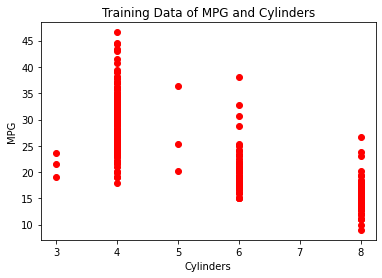

Mean squared error on TRAIN:  24.655233534565706
R2 score on TRAIN:  0.6092657121665905
Mean squared error on TEST:  21.813981353532167
R2 score on TEST:  0.5726149669760379
Coefficient: [-3.65215459]
Intercept:  43.62203602314662


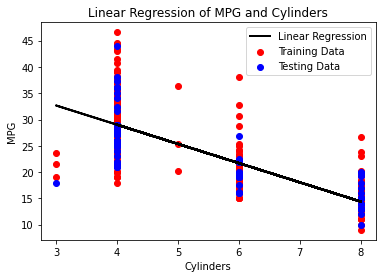

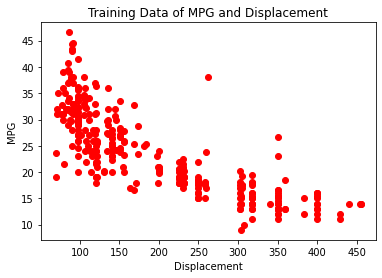

Mean squared error on TRAIN:  21.538297693471062
R2 score on TRAIN:  0.6586626770902894
Mean squared error on TEST:  21.2274842896114
R2 score on TEST:  0.5841057656051312
Coefficient: [-0.06222756]
Intercept:  35.765941772604975


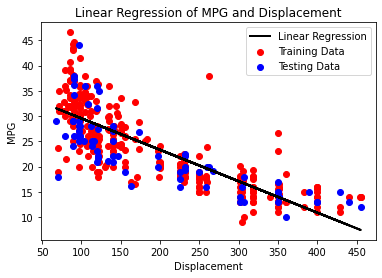

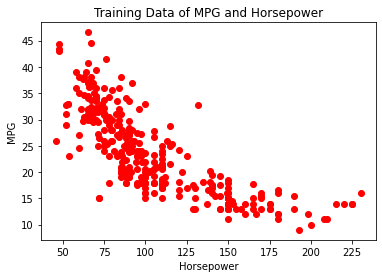

Mean squared error on TRAIN:  24.47516827368345
R2 score on TRAIN:  0.6121193728863614
Mean squared error on TEST:  22.153237123863413
R2 score on TEST:  0.5659681822256185
Coefficient: [-0.16259724]
Intercept:  40.606097600118346


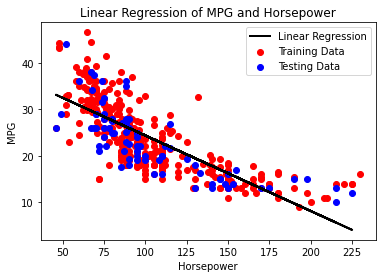

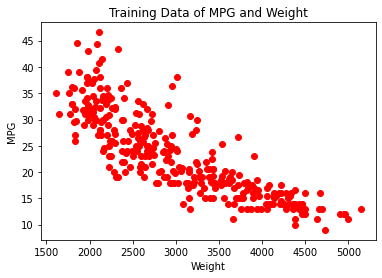

Mean squared error on TRAIN:  19.04510619658238
R2 score on TRAIN:  0.6981745885310532
Mean squared error on TEST:  17.693388269545686
R2 score on TEST:  0.6533466675646016
Coefficient: [-0.00790361]
Intercept:  47.200526427552106


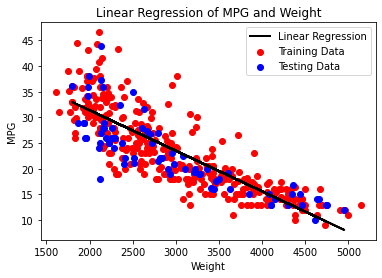

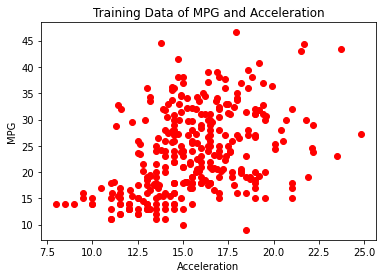

Mean squared error on TRAIN:  52.386427206105246
R2 score on TRAIN:  0.16978383928843055
Mean squared error on TEST:  40.073906749162774
R2 score on TEST:  0.21486189605562878
Coefficient: [1.16342078]
Intercept:  5.5150444023134995


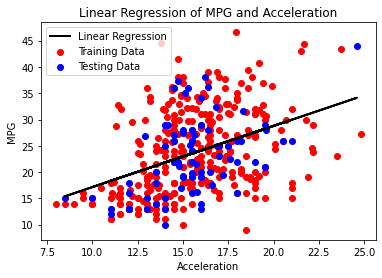

In [120]:
auto_data = pd.read_csv("auto-mpg.csv")
X_all = np.array(auto_data[["cylinders", "displacement", "horsepower", "weight", "acceleration"]])
X_all = np.swapaxes(X_all, 0, 1)
y = np.array(auto_data["mpg"])

i = 0
feature_labels = ["Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration"]

for X in X_all:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    regr = linear_model.LinearRegression()    
    regr.fit(X_train.reshape(-1, 1), y_train)
    plt.scatter(X_train, y_train, color="red")
    plt.xlabel(feature_labels[i])
    plt.ylabel("MPG")
    plt.title(f"Training Data of MPG and {feature_labels[i]}")
    plt.show()


    #Training Data Predictions
    train_pred = regr.predict(X_train.reshape(-1, 1))
    print("Mean squared error on TRAIN: ", mean_squared_error(y_train, train_pred))
    print("R2 score on TRAIN: ", r2_score(y_train, train_pred))

    #Testing Data Predictions
    test_pred = regr.predict(X_test.reshape(-1, 1))
    print("Mean squared error on TEST: ", mean_squared_error(y_test, test_pred))
    print("R2 score on TEST: ", r2_score(y_test, test_pred))

    #Graph
    print("Coefficient:", regr.coef_)
    print("Intercept: ", regr.intercept_)
    plt.scatter(X_train, y_train, color="red")
    plt.scatter(X_test, y_test, color="blue")
    plt.plot(X_test, test_pred, color="black", linewidth=2)

    plt.xlabel(feature_labels[i])
    plt.ylabel("MPG")
    plt.title(f"Linear Regression of MPG and {feature_labels[i]}")
    plt.legend(("Linear Regression", "Training Data", "Testing Data"))
    plt.show()
    i += 1

Question 1.2 (10 points): Combining all of the data, do the following:
- Create an X matrix that includes all five features.
- Do the train test split as indicated above.
- Use sklearn’s LinearRegression() to fit to the training data.
- Create a prediction vector based on the training data, and calculate and print the
mean-squared error and the R2
score using sklearn.
- Create a prediction vector based on the testing data, and calculate and print the
mean-squared error and the R2 score using sklearn.
- Does using all of the data improve performance over using each of the features individually?

In [121]:
X_all = np.array(auto_data[["cylinders", "displacement", "horsepower", "weight", "acceleration"]])

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()    
regr.fit(X_train, y_train)

#Training Data Predictions
train_pred = regr.predict(X_train)
print("Mean squared error on TRAIN: ", mean_squared_error(y_train, train_pred))
print("R2 score on TRAIN: ", r2_score(y_train, train_pred))

#Testing Data Predictions
test_pred = regr.predict(X_test)
print("Mean squared error on TEST: ", mean_squared_error(y_test, test_pred))
print("R2 score on TEST: ", r2_score(y_test, test_pred))

Mean squared error on TRAIN:  17.87980377929501
R2 score on TRAIN:  0.7166422136497115
Mean squared error on TEST:  17.939171976631265
R2 score on TEST:  0.6485312110889081
